# Mini project 2
- 구별 CCTV 설치수
- 구별 CCTV 인구수 비율
- 구별 인구수에 따른 CCTV 비율 산점도 및 line plot
- 구별 인구수 비율 산점도 및 line plot + 컬러맵

In [49]:
# import 

# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic' # 한글 표시
plt.rcParams['axes.unicode_minus'] =False

In [50]:
# 서울 인구 데이터 확인
df_p = pd.read_excel("./data/seoulPopulation.xlsx", engine='openpyxl')
df_p.rename(columns = {'자치구': '기관명'}, inplace = True) # 컬럼 이름 변경
df_p.drop(columns='기간', inplace=True)
df_p.head(10)

,기관명,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764
5,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.15,36231
6,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.32,39997
7,광진구,158960,372164,180992,191172,357211,174599,182612,14953,6393,8560,2.25,42214
8,동대문구,159839,369496,182932,186564,354079,177021,177058,15417,5911,9506,2.22,54173
9,중랑구,177548,414503,206102,208401,409882,204265,205617,4621,1837,2784,2.31,56774


In [51]:
# 서울 CCTV 데이터 확인
df_c = pd.read_csv("./data/seoulCCTV.CSV")
df_c.head(10)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [52]:
# 서울 CCTV 정렬 (소계 기준 오름차순)
df_c = df_c.sort_values(by='소계', ascending=True)
df_c.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


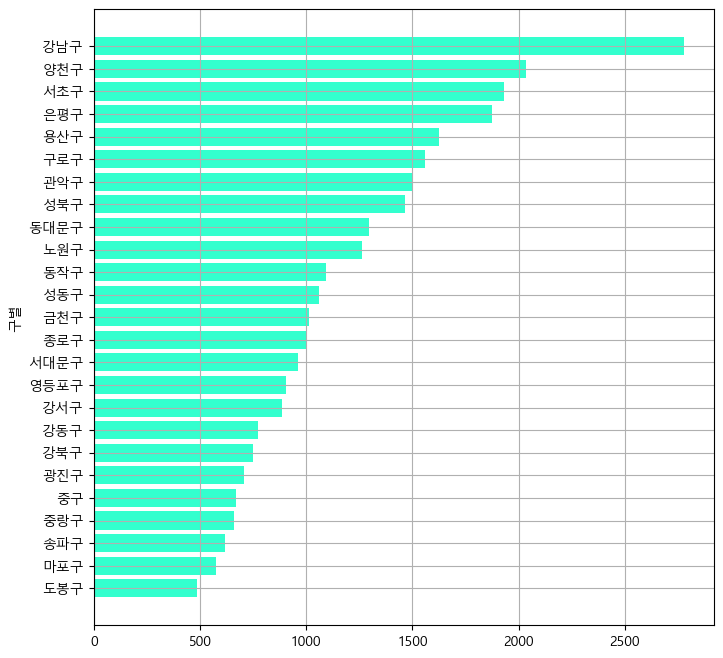

In [53]:
# 구별 CCTV 수 시각화
plt.figure(figsize=(8,8))
plt.barh(df_c['기관명'], df_c['소계'], color='#33FFCE')
plt.ylabel('구별')
plt.grid()

plt.show()

In [54]:
# 데이터 병합
df = pd.merge(df_p.drop(index=[0, 1, 2]), df_c[['소계', '기관명']], on='기관명') # 기관명 기준으로 merge
df.rename(columns={'소계':'CCTV수'}, inplace=True) # 컬럼 이름 변경 : 소계 > CCTV수

# 구별 CCTV설치수/인구수 비율
df['CCTV수/인구'] = df['CCTV수']/df['인구']*100
df = df.sort_values(by='CCTV수/인구', ascending=True)
df.head()

,기관명,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자,CCTV수,CCTV수/인구
23,송파구,259883,667483,325040,342443,660584,321676,338908,6899,3364,3535,2.54,72506,618,0.092587
9,도봉구,136613,348646,171026,177620,346629,170289,176340,2017,737,1280,2.54,51312,485,0.13911
15,강서구,247696,603772,294433,309339,597248,291249,305999,6524,3184,3340,2.41,72548,884,0.146413
13,마포구,169404,389649,185889,203760,378566,181346,197220,11083,4543,6540,2.23,48765,574,0.147312
6,중랑구,177548,414503,206102,208401,409882,204265,205617,4621,1837,2784,2.31,56774,660,0.159227


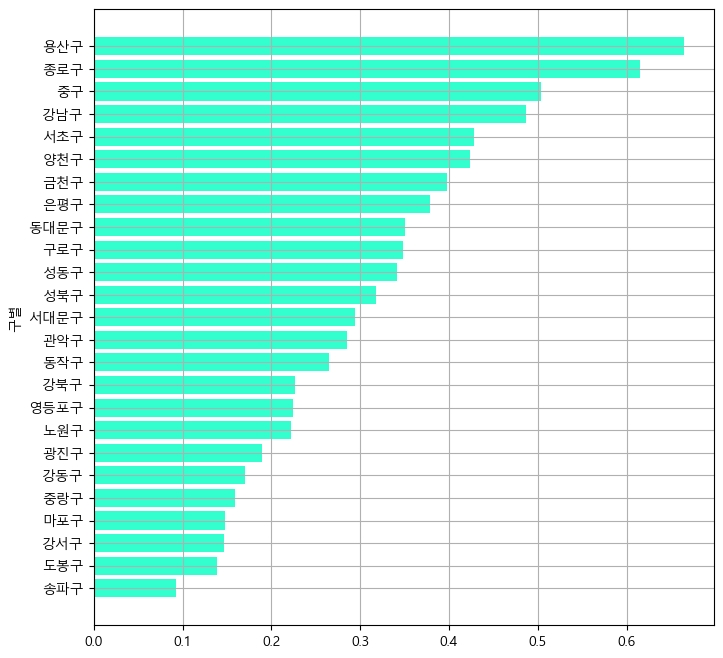

In [55]:
# 구별 CCTV설치수/인구수 비율 시각화
plt.figure(figsize=(8,8))
plt.barh(df['기관명'], df['CCTV수/인구'], color='#33FFCE')
plt.ylabel('구별')
plt.grid()

plt.show()

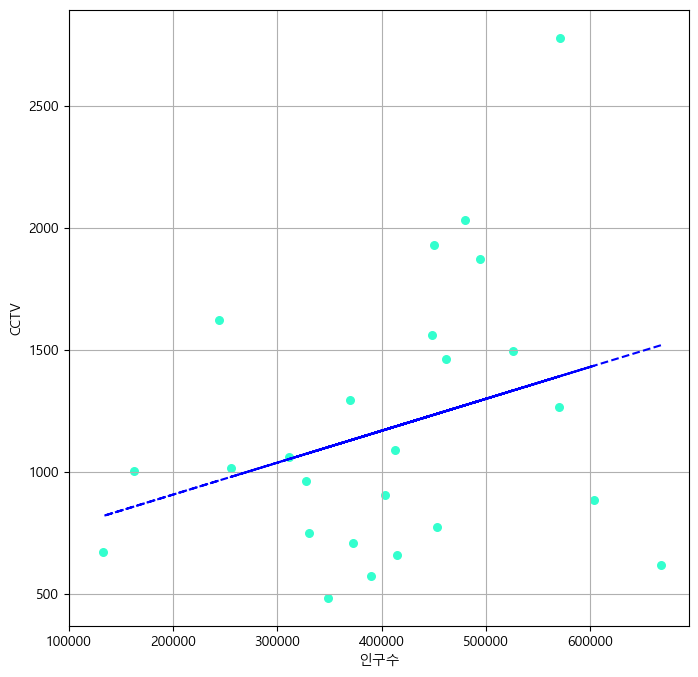

In [56]:
# 구별 인구수에 따른 cctv 비율 산점도 및 line plot

x = list(df['인구'])
y = list(df['CCTV수'])

plt.figure(figsize=(8,8))
plt.scatter(x, y, s=30, c='#33FFCE')

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x), "b--")

plt.xticks(np.arange(100000, 700000, 100000))
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()

plt.show()

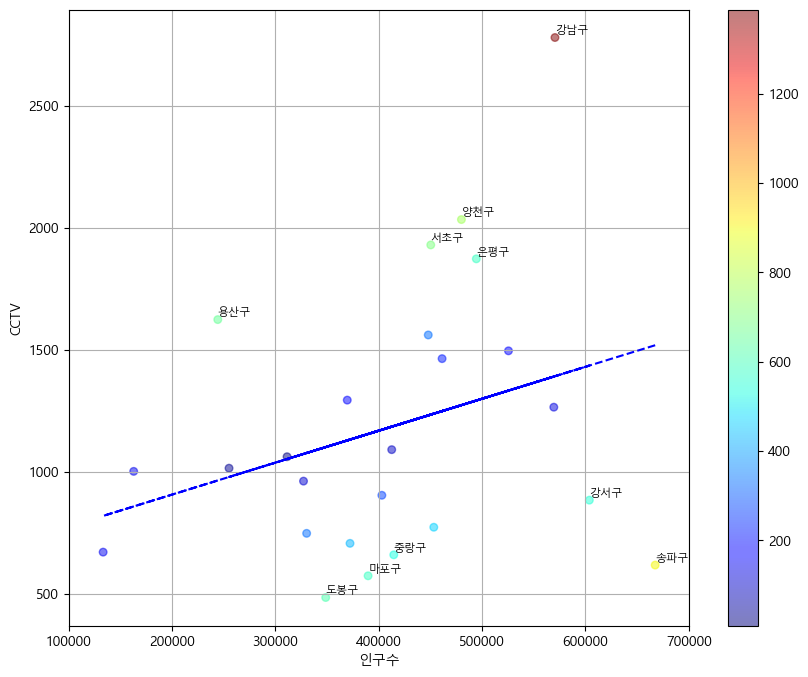

In [57]:
# 구별 인구수 비율 산점도 및 line plot + 컬러맵

x = list(df['인구'])
y = list(df['CCTV수'])

plt.figure(figsize=(10,8))

z = np.polyfit(x, y, 1) # 회귀선
p = np.poly1d(z)
plt.plot(x,p(x), "b--")

residual = list(map(abs, df['CCTV수']-p(x)))
plt.scatter(x, y, s=30, c=residual, cmap='jet', alpha=0.5) # y값 간의 거리를 컬러맵으로 표시
plt.colorbar()

plt.xticks(np.arange(100000, 800000, 100000)) # x 범위
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()

# 잔차 상위 10개만 기관명 출력
df['residual'] = residual
df.sort_values(by='residual', inplace=True, ascending=False)

# 기관명 표시하기
for i in range(10): # 행 개수만큼 순회
    row = df.iloc[i] # 한 행씩 꺼내기
    name = row['기관명'] # 이름이 저장된 열
    x = row['인구'] # x좌표가 저장된 열
    y = row['CCTV수'] # y좌표가 저장된 열
    
    plt.text(x+50, y+15, name, fontsize = 8) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()